In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

In [ ]:
train = pd.read_csv('train.csv', index_col='_id');
train.head().T

In [31]:
df_0 = pd.DataFrame(train.target.value_counts())
df_0['Percentage'] = 100*df_0['target']/train.shape[0]
df_0

,target,Percentage
0,21925,88.722078
1,2787,11.277922


In [15]:
#y = train['target'].values

In [16]:
#train = train.drop('target', axis=1);
#train.head().T

_id,df7489733b004bbe40d3d37b34f82419,905a0b9a5456ee962223033473666be3,02d69c07ec6d68e31d641edd45ce61cd,e492fbe0cccaf67cdb5c0944dbc8a167,ac2dc6f5835bdea8e71dd99b65208d07
age,54,36,53,34,29
job,technician,services,blue-collar,blue-collar,services
marital,married,single,married,married,single
education,professional.course,basic.4y,basic.4y,basic.9y,university.degree
default,unknown,no,no,no,no
housing,no,no,yes,yes,yes
loan,no,no,no,yes,no
contact,cellular,telephone,cellular,telephone,telephone
month,aug,may,aug,may,aug
day_of_week,tue,mon,mon,wed,fri


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24712 entries, df7489733b004bbe40d3d37b34f82419 to 46d0d25dfd1def79632dd437261d0b5c
Data columns (total 21 columns):
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64

In [52]:
train_knn = train.copy();
train_knn.shape

(24712, 21)

In [34]:
train_knn.loc[:, 'target'].value_counts()

0    21925
1     2787
Name: target, dtype: int64

In [35]:
train_knn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,24712,NaN,NaN,NaN,40.0302,10.4623,17,32,38,47,98
job,24712,12,admin.,6254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,24712,4,married,14871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,24712,8,university.degree,7309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,24712,3,no,19567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,24712,3,yes,12934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,24712,3,no,20334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,24712,2,cellular,15729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,24712,10,may,8199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,24712,5,thu,5144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
def preproc(df_init):
    df_preproc = df_init.copy()
    
    df_preproc = df_preproc.drop(['job', 'marital', 'education', 'day_of_week', 'month'], axis = 1)
    
    # Замена бинарных признаков
    df_preproc.loc[:, ["poutcome"]] = \
    df_preproc.loc[:, ["poutcome"]].replace({'failure': 0, 'nonexistent': 0, 'success': 1});
    
    df_preproc.loc[:, ["contact"]] = \
    df_preproc.loc[:, ["contact"]].replace({'telephone': 0, 'cellular': 1});
    
    df_preproc.loc[:, ["default", 'housing', 'loan']] = \
    df_preproc.loc[:, ['default', 'housing', 'loan']].replace({'no': 0, 'unknown':0, 'yes': 1})
        
    return df_preproc

In [54]:
df_preproc = train_knn.pipe(preproc);
df_preproc.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
_id,,,,,,,,,,,,,,,,
df7489733b004bbe40d3d37b34f82419,54,0,0,0,1,87,1,999,0,0,1.4,93.444,-36.1,4.963,5228.1,0
905a0b9a5456ee962223033473666be3,36,0,0,0,0,291,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
02d69c07ec6d68e31d641edd45ce61cd,53,0,1,0,1,182,1,999,0,0,1.4,93.444,-36.1,4.965,5228.1,0
e492fbe0cccaf67cdb5c0944dbc8a167,34,0,1,1,0,180,2,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
ac2dc6f5835bdea8e71dd99b65208d07,29,0,1,0,0,6,1,999,0,0,-1.7,94.027,-38.3,0.890,4991.6,0


In [55]:
train_knn = df_preproc
train_knn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24712 entries, df7489733b004bbe40d3d37b34f82419 to 46d0d25dfd1def79632dd437261d0b5c
Data columns (total 16 columns):
age               24712 non-null int64
default           24712 non-null int64
housing           24712 non-null int64
loan              24712 non-null int64
contact           24712 non-null int64
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null int64
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: float64(5), int64(11)
memory usage: 3.2+ MB


In [39]:
train_knn.head()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
_id,,,,,,,,,,,,,,,,
df7489733b004bbe40d3d37b34f82419,54,0,0,0,1,87,1,999,0,0,1.4,93.444,-36.1,4.963,5228.1,0
905a0b9a5456ee962223033473666be3,36,0,0,0,0,291,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
02d69c07ec6d68e31d641edd45ce61cd,53,0,1,0,1,182,1,999,0,0,1.4,93.444,-36.1,4.965,5228.1,0
e492fbe0cccaf67cdb5c0944dbc8a167,34,0,1,1,0,180,2,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
ac2dc6f5835bdea8e71dd99b65208d07,29,0,1,0,0,6,1,999,0,0,-1.7,94.027,-38.3,0.890,4991.6,0


In [56]:
X, y = train_knn.iloc[:, :-1].values, train_knn.iloc[:, -1].values

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

In [58]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state = 88)

In [59]:
from sklearn.preprocessing import StandardScaler 
# StandardScaler штука, которая нормирует данные.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [60]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [61]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [62]:
y_hat = model.predict(X_test)

In [63]:
y_hat_proba = model.predict_proba(X_test)

In [64]:
y_hat_proba.shape

(4943, 2)

In [65]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_hat_proba[:, 1])

0.8737850191948605

In [ ]:
0.8737850191948605

In [96]:
scores_test = []
scores_train = []

for k in range(1, 19):
        
    model = Pipeline([
      ('scaler', StandardScaler()),
      ('knn', KNeighborsClassifier(n_neighbors=k)) ])
    
    model.fit(X_train, y_train, )

    y_hat_test = model.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))

    y_hat_train = model.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))

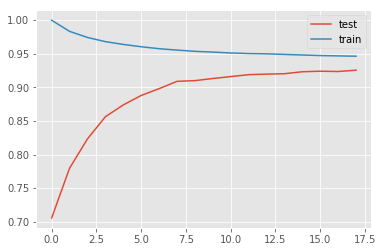

In [97]:
plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()

In [50]:
model_n = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=15))
])
model_n.fit(X_train, y_train)
y_hat_n = model_n.predict(X_test)
y_hat_proba_n = model_n.predict_proba(X_test)
roc_auc_score(y_test, y_hat_proba_n[:, 1])

0.9231522090411709

In [ ]:
scores_test = []
scores_train = []

for l in range(1, 10):
        
    model = Pipeline([
      ('scaler', StandardScaler()),
      ('knn', KNeighborsClassifier(n_neighbors=15, n_jobs=1, p=l)) ])
    
    model.fit(X_train, y_train, )

    y_hat_test = model.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))

    y_hat_train = model.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))

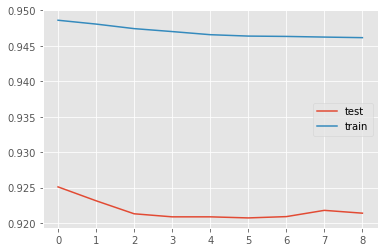

In [106]:
plt.plot(scores_test, label='test')
plt.plot(scores_train, label='train')
plt.legend()

In [66]:
model_n = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(algorithm = 'auto', metric='minkowski', n_neighbors=15, n_jobs=1, p=1))
])
model_n.fit(X_train, y_train)
y_hat_n = model_n.predict(X_test)
y_hat_proba_n = model_n.predict_proba(X_test)
roc_auc_score(y_test, y_hat_proba_n[:, 1])

0.9251096441116176

In [26]:
#16 = 0.9266908533878275
#17 = 0.9283834614078843

In [67]:
test = pd.read_csv('test.csv', index_col='_id');
test_knn = test.pipe(preproc);
test_knn.info()
test_knn.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16476 entries, 66810d8e6bf2b41c880a7bc6c8a1e295 to 82db4c5dd22e8182b30917571fe77c4d
Data columns (total 15 columns):
age               16476 non-null int64
default           16476 non-null int64
housing           16476 non-null int64
loan              16476 non-null int64
contact           16476 non-null int64
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null int64
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(10)
memory usage: 2.0+ MB


,age,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
_id,,,,,,,,,,,,,,,
66810d8e6bf2b41c880a7bc6c8a1e295,57,0,0,1,1,371,1,999,1,0,-1.8,92.893,-46.2,1.299,5099.1
ccac3879652b08cb8b44c1920fd93afa,55,0,1,0,0,285,2,999,0,0,1.1,93.994,-36.4,4.860,5191.0
fcccab4d7a76f70647f015f2c84c2af8,33,0,0,0,1,52,1,999,1,0,-1.8,92.893,-46.2,1.313,5099.1
ed8399278c30678dab739045fa12b440,36,0,0,0,0,355,4,999,0,0,1.4,94.465,-41.8,4.967,5228.1
1d4d62ac5cabcb48bac7112813f290cb,27,0,1,0,1,189,2,999,0,0,1.4,93.918,-42.7,4.963,5228.1


In [68]:
res_knn = model_n.predict(test_knn);
res_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
test_out = test_knn.drop(['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'nr.employed'], axis=1)
test_out = test_out.drop(['previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], axis=1)
test_out['target'] = res_knn
test_out.loc[:, 'target'].value_counts()
#test_out

0    15291
1     1185
Name: target, dtype: int64

In [71]:
test_out.to_csv('res_knn.csv')

In [66]:
#df_preproc = df_preproc.drop(['job', 'marital', 'education', 'day_of_week', 'month'], axis = 1)

# Деревья решений

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pydot
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
import subprocess

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from ipywidgets import interact, IntSlider, FloatSlider

import os
os.environ["PATH"] += os.pathsep + 'C:\ProgramData\Anaconda3\Library\\bin\graphviz'

In [3]:
train = pd.read_csv('train.csv', index_col='_id');
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24712 entries, df7489733b004bbe40d3d37b34f82419 to 46d0d25dfd1def79632dd437261d0b5c
Data columns (total 21 columns):
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64

In [83]:
def preproc(df_init):
    df_preproc = df_init.copy()
    
    df_preproc = df_preproc.drop(['month', 'day_of_week'], axis=1)
    
    df_preproc.loc[:, ["poutcome"]] = \
    df_preproc.loc[:, ["poutcome"]].replace({'failure': 0, 'nonexistent': 0, 'success': 1});
    
    df_preproc.loc[:, ["contact"]] = \
    df_preproc.loc[:, ["contact"]].replace({'telephone': 0, 'cellular': 1});
    
    df_preproc.loc[:, ["default", 'housing', 'loan']] = \
    df_preproc.loc[:, ['default', 'housing', 'loan']].replace({'no': 0, 'unknown':0, 'yes': 1})
    
    df_preproc.loc[:, ["education"]] = \
    df_preproc.loc[:, ["education"]].replace({'basic.4y': 1, 'basic.6y': 1.5, 'basic.9y': 2, 'high.school':3, \
                                             "illiterate": 4, "professional.course":5, "university.degree":6, "unknown":2});
    
    df_preproc.loc[:, ["marital"]] = \
    df_preproc.loc[:, ["marital"]].replace({"divorced":1, "single": 1, "married": 2, "unknown": 0});
    
    df_preproc.loc[:, ["job"]] = \
    df_preproc.loc[:, ["job"]].replace({"admin.": 1, "blue-collar": 1, "entrepreneur": 1, "housemaid":0, \
        "management": 1, "retired":0, "self-employed":0, "services":1, "student":0, "technician":1, "unemployed":0, "unknown":0});
    
        
    return df_preproc

In [84]:
df_preproc = train.pipe(preproc)
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24712 entries, df7489733b004bbe40d3d37b34f82419 to 46d0d25dfd1def79632dd437261d0b5c
Data columns (total 19 columns):
age               24712 non-null int64
job               24712 non-null int64
marital           24712 non-null int64
education         24712 non-null float64
default           24712 non-null int64
housing           24712 non-null int64
loan              24712 non-null int64
contact           24712 non-null int64
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null int64
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: float64(6), int64(13)
memory usage: 3.8+ MB


In [85]:
X, y = df_preproc.iloc[:, :-1].values, df_preproc.iloc[:, -1].values

In [86]:
try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

try:
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import StratifiedKFold

In [93]:
model = DecisionTreeClassifier(random_state=88)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=88)

train_scores, valid_scores = validation_curve(model, X, y, 
                                              'max_depth', range(1, 12),
                                              cv=cv, scoring='roc_auc')

In [94]:
print(train_scores.shape);
valid_scores.shape

(19, 5)


(19, 5)

Text(0,0.5,'ROC AUC')

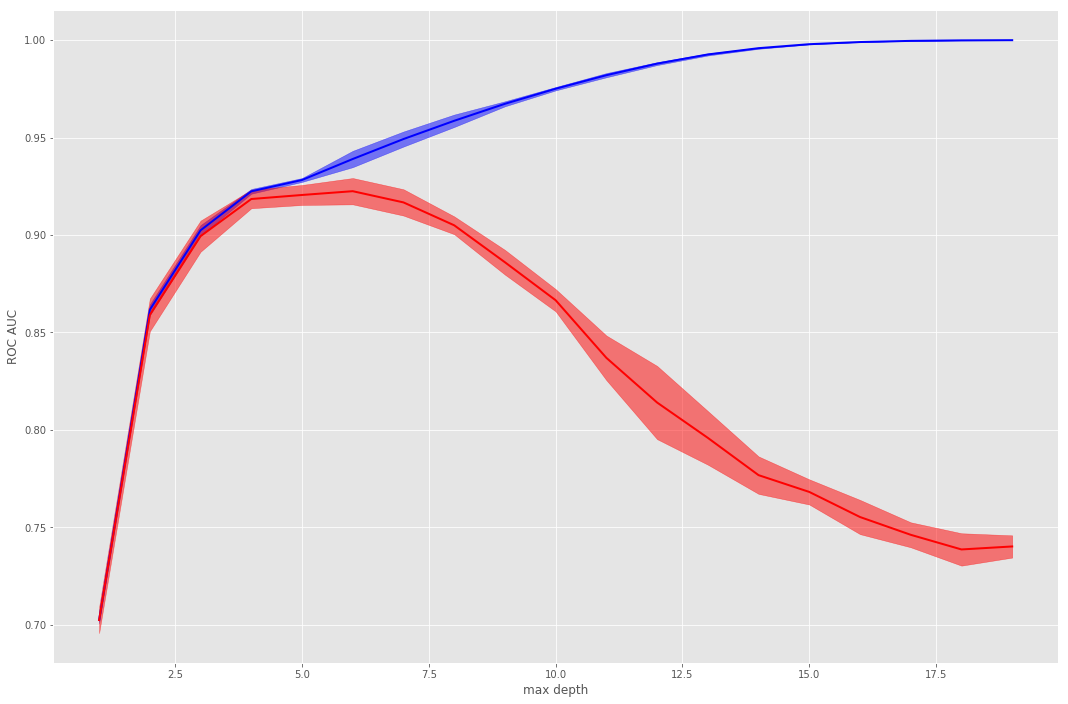

In [95]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,20), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,20), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,20), train_score_mean, c='b', lw=2)
plt.plot(range(1,20), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('ROC AUC')

In [96]:
from scipy.stats import randint as randint
from scipy.stats import uniform

try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import GridSearchCV
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold


RND_SEED = 123

In [97]:
# Определим пространство поиска

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 8),
    'min_samples_leaf': randint(5, 10),
    'class_weight': [None, 'balanced']}

# Некоторые параметры мы задали не простым перечислением значений, а 
# с помощью распределений.

# Будем делать 200 запусков поиска
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

model = DecisionTreeClassifier(random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=200, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)
# А дальше, просто .fit()
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000AF3B940>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000AF3B550>, 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [98]:
random_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 7}

In [99]:
random_search.best_score_
#0.9366458892627989

0.9366458892627989

In [100]:
best_model = random_search.best_estimator_;
best_model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=6, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [101]:
test = pd.read_csv('test.csv', index_col='_id');
test_tree = test.pipe(preproc);
test_tree.info()
test_tree.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16476 entries, 66810d8e6bf2b41c880a7bc6c8a1e295 to 82db4c5dd22e8182b30917571fe77c4d
Data columns (total 18 columns):
age               16476 non-null int64
job               16476 non-null int64
marital           16476 non-null int64
education         16476 non-null float64
default           16476 non-null int64
housing           16476 non-null int64
loan              16476 non-null int64
contact           16476 non-null int64
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null int64
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(6), int64(12)
memory usage: 2.4+ MB


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
_id,,,,,,,,,,,,,,,,,,
66810d8e6bf2b41c880a7bc6c8a1e295,57,1,2,3.0,0,0,1,1,371,1,999,1,0,-1.8,92.893,-46.2,1.299,5099.1
ccac3879652b08cb8b44c1920fd93afa,55,0,2,2.0,0,1,0,0,285,2,999,0,0,1.1,93.994,-36.4,4.860,5191.0
fcccab4d7a76f70647f015f2c84c2af8,33,1,2,2.0,0,0,0,1,52,1,999,1,0,-1.8,92.893,-46.2,1.313,5099.1
ed8399278c30678dab739045fa12b440,36,1,2,3.0,0,0,0,0,355,4,999,0,0,1.4,94.465,-41.8,4.967,5228.1
1d4d62ac5cabcb48bac7112813f290cb,27,0,2,3.0,0,1,0,1,189,2,999,0,0,1.4,93.918,-42.7,4.963,5228.1


In [102]:
res_tree = best_model.predict(test_tree);
res_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
test_out = test_tree.drop(['age', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays', 'nr.employed'], axis=1)
test_out = test_out.drop(['previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], axis=1)
test_out = test_out.drop(['job', 'marital', 'education'], axis=1)
test_out['target'] = res_tree
test_out.loc[:, 'target'].value_counts()
#test_out

0    12289
1     4187
Name: target, dtype: int64

In [108]:
test_out.to_csv('res_tree.csv')

Важность признаков

In [109]:
model = random_search.best_estimator_
imp = model.feature_importances_

In [110]:
pd.Series(index=df_preproc.columns[:-1], data = imp).sort_values()

education         0.000000
default           0.000000
loan              0.000000
housing           0.000042
campaign          0.000214
marital           0.000349
poutcome          0.001209
job               0.001611
age               0.002026
contact           0.002083
previous          0.003128
cons.price.idx    0.005880
pdays             0.008187
euribor3m         0.044857
emp.var.rate      0.064771
cons.conf.idx     0.083324
nr.employed       0.271329
duration          0.510990
dtype: float64

# Деревья решений 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pydot
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
import subprocess
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from ipywidgets import interact, IntSlider, FloatSlider

import os
os.environ["PATH"] += os.pathsep + 'C:\ProgramData\Anaconda3\Library\\bin\graphviz'

In [206]:
train = pd.read_csv('train.csv', index_col='_id');
#train.info()

In [207]:
def preproc(df_init):
    df_preproc = df_init.copy()
    # убираю больше столбцов
    df_preproc = df_preproc.drop(['month', "contact", 'day_of_week', "default", "education", 'loan', 'job', 'housing', 'poutcome', 'marital'], axis=1)
    
    #df_preproc = pd.get_dummies(df_preproc, columns=[])
    
    #df_preproc.loc[:, ["poutcome"]] = \
    #df_preproc.loc[:, ["poutcome"]].replace({'failure': 0, 'nonexistent': 0, 'success': 1});
    
    #df_preproc.loc[:, ["contact"]] = \
    #df_preproc.loc[:, ["contact"]].replace({'telephone': 1, 'cellular': 0});
    
    #df_preproc.loc[:, ['housing']] = \
    #df_preproc.loc[:, ['housing']].replace({'no': 0, 'unknown':0, 'yes': 1})
    
    df_preproc.loc[df_preproc['duration'] < 200 , 'duration'] = 0
    
        
    #df_preproc.loc[:, ["marital"]] = \
    #df_preproc.loc[:, ["marital"]].replace({"divorced":1, "single": 1, "married": 1, "unknown": 0});
    
    #df_preproc.loc[:, ["job"]] = \
    #df_preproc.loc[:, ["job"]].replace({"admin.": 2, "blue-collar": 1, "entrepreneur": 1, "housemaid":0, \
        #"management": 3, "retired":1, "self-employed":0, "services":1, "student":0, "technician":1, "unemployed":0, "unknown":0});
    
        
    return df_preproc

In [208]:
train[train['target'] == 1].median()

age                 37.000
duration           442.000
campaign             2.000
pdays              999.000
previous             0.000
emp.var.rate        -1.800
cons.price.idx      93.200
cons.conf.idx      -40.400
euribor3m            1.266
nr.employed       5099.100
target               1.000
dtype: float64

In [209]:
df_preproc = train.pipe(preproc)
#df_preproc.info()

In [210]:
df_preproc[df_preproc['target'] == 1].mean()

age                 40.825619
duration           530.140294
campaign             2.049157
pdays              794.471834
previous             0.486545
emp.var.rate        -1.230858
cons.price.idx      93.362048
cons.conf.idx      -39.837890
euribor3m            2.124053
nr.employed       5094.789056
target               1.000000
dtype: float64

count    24712.000000
mean       258.345298
std        261.573344
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [211]:
X, y = df_preproc.iloc[:, :-1].values, df_preproc.iloc[:, -1].values

In [212]:
from scipy.stats import randint as randint
from scipy.stats import uniform
from sklearn.model_selection import StratifiedShuffleSplit

try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import GridSearchCV
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold
    

RND_SEED = 11

In [228]:
# старый вариант
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 10),
    'min_samples_leaf': randint(3, 12),
    #'min_samples_split': randint(3, 10),
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'random_state': randint(2,200),
    #'min_impurity_decrease': randint(2, 10),
    'class_weight': [None, 'balanced']}

# Некоторые параметры мы задали не простым перечислением значений, а 
# с помощью распределений.

# Будем делать 200 запусков поиска
cv = StratifiedKFold(n_splits=4, random_state=11, shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=6, test_size=0.25, random_state=42)

model = DecisionTreeClassifier(random_state=11)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=200, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=11)
# А дальше, просто .fit()
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=4, random_state=11, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000B826F60>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000B826D68>, 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=11, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [229]:
print (random_search.best_params_);
print (random_search.best_score_)
#0.9368597034664192
#0.9382504406387026
# n_splits=6 0.9395784805071703
# n_splits=7 0.9396855904226843

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10}
0.9330968469469165


In [230]:
best_model2 = random_search.best_estimator_;
best_model2

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=7, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

In [231]:
pd.Series(index=df_preproc.columns[:-1], data = best_model2.feature_importances_).sort_values()

previous          0.003109
cons.price.idx    0.004841
campaign          0.007865
age               0.010131
pdays             0.012294
emp.var.rate      0.064048
euribor3m         0.067591
cons.conf.idx     0.082067
nr.employed       0.269379
duration          0.478675
dtype: float64

In [232]:
test = pd.read_csv('test.csv', index_col='_id');
test_tree = test.pipe(preproc);
#test_tree.info()
#test_tree.head()

In [233]:
res_tree = best_model2.predict(test_tree);
res_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [234]:
test_out = test_tree[['duration']]
test_out = test_out.drop(['duration'], axis=1)
test_out['target'] = res_tree
test_out.loc[:, 'target'].value_counts()
#test_out
#0    12289
#1     4187
#Name: target, dtype: int64
# стало хуже когда random_state': 92
#0    12383
#1     4093
#Name: target, dtype: int64

0    12277
1     4199
Name: target, dtype: int64

In [235]:
test_out.to_csv('res_tree8.csv')

# Логистическая регрессия

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pydot
from IPython.display import Image

from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from ipywidgets import interact, IntSlider
import subprocess

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from ipywidgets import interact, IntSlider, FloatSlider

In [25]:
train = pd.read_csv('train.csv', index_col='_id');
#train.head().T

In [26]:
train_lr = train.copy();
train_lr.shape

(24712, 21)

In [27]:
def preproc(df_init):
    df_preproc = df_init.copy()
    # убираю больше столбцов
    df_preproc = df_preproc.drop(['month', 'day_of_week', "default", "education", 'loan'], axis=1)
    
    df_preproc.loc[:, ["poutcome"]] = \
    df_preproc.loc[:, ["poutcome"]].replace({'failure': 0, 'nonexistent': 0, 'success': 1});
    
    df_preproc.loc[:, ["contact"]] = \
    df_preproc.loc[:, ["contact"]].replace({'telephone': 0, 'cellular': 1});
    
    df_preproc.loc[:, ['housing']] = \
    df_preproc.loc[:, ['housing']].replace({'no': 0, 'unknown':0, 'yes': 1})
    
    df_preproc.loc[:, ['duration']] = \
    df_preproc.loc[:, ['duration']].replace({1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 9:0, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0,})
        
    df_preproc.loc[:, ["marital"]] = \
    df_preproc.loc[:, ["marital"]].replace({"divorced":1, "single": 1, "married": 2, "unknown": 0});
    #пробую изменить значения для работ, чтобы повысить вес этого параметра и в итоге повысить точность - не работает это
    df_preproc.loc[:, ["job"]] = \
    df_preproc.loc[:, ["job"]].replace({"admin.": 2, "blue-collar": 1, "entrepreneur": 1, "housemaid":0, \
        "management": 2, "retired":0, "self-employed":0, "services":1, "student":0, "technician":1, "unemployed":0, "unknown":0});
    
        
    return df_preproc

In [51]:
df_preproc = train_lr.pipe(preproc);
df_preproc.shape

(24712, 16)

In [52]:
X, y = df_preproc.iloc[:, :-1].values, df_preproc.iloc[:, -1].values

In [53]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state = 11)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19769, 15)
(4943, 15)
(19769,)
(4943,)


In [55]:
#LogisticRegression
model = LogisticRegression()                     
model.fit(X_train, y_train)                      
predict = model.predict(X_test)

In [56]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))
pr_sc0 = precision_score(y_test, predict)
re_sc0 = recall_score(y_test, predict)
acc_sc0 = accuracy_score(y_test, predict)
f1_sc0 = f1_score(y_test, predict)

precision 0.6705539358600583
recall 0.40421792618629176
accuracy 0.908557556139996
f1 0.5043859649122807


In [57]:
predict_proba = model.predict_proba(X_test)
predict_proba[:,1]

array([0.03045776, 0.00703228, 0.01678735, ..., 0.17126034, 0.29051892,
       0.18869566])

In [58]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

lr = LogisticRegression()
cvs = cross_val_score(
    lr,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10
)
print ('Среднее значение roc_auc для модели LogisticRegression', np.mean(cvs))

Среднее значение roc_auc для модели LogisticRegression 0.9196971105540218


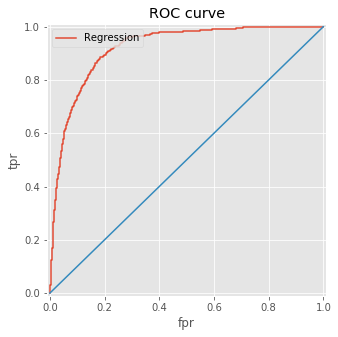

roc_auc для модели LogisticRegression 0.9193223577892371


In [59]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])

plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(['Regression'],
            loc='upper left')


plt.show()
print ('roc_auc для модели LogisticRegression', roc_auc_score(y_test, predict_proba[:,1]))


In [60]:
test = pd.read_csv('test.csv', index_col='_id');
test_lr = test.pipe(preproc);
test_lr.info()
test_lr.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16476 entries, 66810d8e6bf2b41c880a7bc6c8a1e295 to 82db4c5dd22e8182b30917571fe77c4d
Data columns (total 15 columns):
age               16476 non-null int64
job               16476 non-null int64
marital           16476 non-null int64
housing           16476 non-null int64
contact           16476 non-null int64
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null int64
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(10)
memory usage: 2.0+ MB


,age,job,marital,housing,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
_id,,,,,,,,,,,,,,,
66810d8e6bf2b41c880a7bc6c8a1e295,57,1,2,0,1,371,1,999,1,0,-1.8,92.893,-46.2,1.299,5099.1
ccac3879652b08cb8b44c1920fd93afa,55,0,2,1,0,285,2,999,0,0,1.1,93.994,-36.4,4.860,5191.0
fcccab4d7a76f70647f015f2c84c2af8,33,1,2,0,1,52,1,999,1,0,-1.8,92.893,-46.2,1.313,5099.1
ed8399278c30678dab739045fa12b440,36,2,2,0,0,355,4,999,0,0,1.4,94.465,-41.8,4.967,5228.1
1d4d62ac5cabcb48bac7112813f290cb,27,0,2,1,1,189,2,999,0,0,1.4,93.918,-42.7,4.963,5228.1


In [61]:
res_lr = model.predict(test_lr);
res_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
test_out = test_lr.drop(['age', 'housing', 'contact', 'duration', 'campaign', 'pdays', 'nr.employed'], axis=1)
test_out = test_out.drop(['previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'], axis=1)
test_out = test_out.drop(['job', 'marital'], axis=1)
test_out['target'] = res_lr
test_out.loc[:, 'target'].value_counts()
#0    15374
#1     1102
#Name: target, dtype: int64

0    15374
1     1102
Name: target, dtype: int64

In [23]:
test_out.to_csv('res_lr1.csv')